In [1]:
!pip install networkx matplotlib

# **IMPORT LAIBRARIES**

In [2]:
import pandas as pd
import os
from google.colab import drive
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

I am using Colab Notebook to create this project.

In [3]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Colab Notebooks/Machine learning projects/Student_Association_Rule'
file_name = "PDT_2022_PUB_MRUN.csv"
file_path = os.path.join(folder_path, file_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [4]:
# Try reading the CSV file with different encodings
encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file using encoding: {encoding}")
        break  # Exit the loop if reading is successful
    except UnicodeDecodeError:
        print(f"Failed to read the file using encoding: {encoding}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Failed to read the file using encoding: utf-8


<ipython-input-4-a8b82c2a918c>:6: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding=encoding)


Successfully read the file using encoding: latin-1


In [5]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MRUN,ANYO_PROCESO,CODIGO_REGION_DOMICILIO,CODIGO_PROVINCIA_DOMICILIO,CODIGO_COMUNA_DOMICILIO,NOMBRE_PROVINCIA_DOMICILIO,NOMBRE_COMUNA_DOMICILIO,CIUDAD_DOMICILIO,SEXO,FECHA_NACIMIENTO,...,DISPOSITIVO_1,DISPOSITIVO_2,DISPOSITIVO_3,DISPOSITIVO_4,DISPOSITIVO_5,USO_DISPOSITIVO_1,USO_DISPOSITIVO_2,USO_DISPOSITIVO_3,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE
0,3278543,2022,13,136,13604,TALAGANTE,PADRE HURTADO,SANTIAGO,1,200208,...,S,N,S,N,N,3,,4,S,2
1,9601973,2022,15,151,15101,ARICA,ARICA,ARICA,1,194612,...,S,N,N,N,N,4,,,S,2
2,3703667,2022,9,91,9101,CAUTIN,TEMUCO,TEMUCO,1,194708,...,S,N,S,N,N,2,,2,S,1
3,1963581,2022,2,22,2203,EL LOA,SAN PEDRO DE ATACAMA,SAN PEDRO DE ATACAMA,1,195001,...,S,N,N,N,N,2,,,S,2
4,21486005,2022,13,131,13104,SANTIAGO,CONCHALI,SANTIAGO,1,194707,...,S,S,S,N,N,4,1,4,S,2


In [6]:
data.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,MRUN,ANYO_PROCESO,CODIGO_REGION_DOMICILIO,CODIGO_PROVINCIA_DOMICILIO,CODIGO_COMUNA_DOMICILIO,SEXO,FECHA_NACIMIENTO,ECONOMICAMENTE,TIENE_TRABAJO_REM,HORARIO_TRABAJO,CUANTOS_TRABAJAN_GRUPO_FAM,PERSONAS_ESTUDIAN_SUP
MRUN,1.000000,NaN,0.004480,0.004027,0.004033,-0.000145,-0.003285,0.003556,0.003518,-0.013917,-0.005903,0.005103
ANYO_PROCESO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODIGO_REGION_DOMICILIO,0.004480,NaN,1.000000,0.999193,0.999213,-0.004870,-0.014360,0.003858,0.011746,-0.013103,0.009852,0.002336
CODIGO_PROVINCIA_DOMICILIO,0.004027,NaN,0.999193,1.000000,0.999998,-0.004741,-0.013877,0.003409,0.011333,-0.012619,0.009690,0.002279
CODIGO_COMUNA_DOMICILIO,0.004033,NaN,0.999213,0.999998,1.000000,-0.004743,-0.013865,0.003383,0.011318,-0.012609,0.009665,0.002250
SEXO,-0.000145,NaN,-0.004870,-0.004741,-0.004743,1.000000,-0.003839,-0.031533,-0.047913,0.039621,-0.030308,-0.047966
FECHA_NACIMIENTO,-0.003285,NaN,-0.014360,-0.013877,-0.013865,-0.003839,1.000000,-0.320883,-0.248144,0.339792,-0.160131,-0.132543
ECONOMICAMENTE,0.003556,NaN,0.003858,0.003409,0.003383,-0.031533,-0.320883,1.000000,0.352436,-0.122268,0.320049,0.280600
TIENE_TRABAJO_REM,0.003518,NaN,0.011746,0.011333,0.011318,-0.047913,-0.248144,0.352436,1.000000,-0.156470,0.273387,0.251319
HORARIO_TRABAJO,-0.013917,NaN,-0.013103,-0.012619,-0.012609,0.039621,0.339792,-0.122268,-0.156470,1.000000,0.025757,0.001098


## **2. Data Preprocessing:**

**Important Columns**

In [7]:
df = data[['EDUCACION_MADRE', 'COMPLETO_EDUCACION_MADRE', 'EDUCACION_PADRE', 'COMPLETO_EDUCACION_PADRE', 'TIENE_TRABAJO_REM', 'HORARIO_TRABAJO',
            'CON_QUIEN_VIVE_1', 'CON_QUIEN_VIVE_2', 'CON_QUIEN_VIVE_3', 'CON_QUIEN_VIVE_4', 'CON_QUIEN_VIVE_5', 'CON_QUIEN_VIVE_6', 'CON_QUIEN_VIVE_7',
            'CON_QUIEN_VIVE_8', 'CON_QUIEN_VIVE_9', 'CON_QUIEN_VIVE_10', 'ESTUDIO_INSTITUCION_SUPERIOR', 'TIPO_INSTITUCION', 'INGRESO_PERCAPITA_GRUPO_FA',
            'HOGAR_CONEXION_INTERNET', 'CONEXION_INSUFICIENTE', 'TITULACION_CARRERA', 'ECONOMICAMENTE', 'PERSONAS_ESTUDIAN_SUP']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,CON_QUIEN_VIVE_2,CON_QUIEN_VIVE_3,CON_QUIEN_VIVE_4,...,CON_QUIEN_VIVE_9,CON_QUIEN_VIVE_10,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
0,5,S,9,S,0,9,S,S,N,N,...,N,N,N,,9,S,2,,1,16
1,5,S,7,S,2,1,N,N,S,N,...,N,N,S,3,99,S,2,N,9,1
2,7,N,5,N,2,2,N,N,N,N,...,N,N,S,3,5,S,1,N,2,16
3,5,N,5,N,0,9,N,N,N,N,...,N,N,S,1,7,S,2,N,9,16
4,13,,13,,0,9,N,N,N,N,...,N,N,N,,2,S,2,,2,16


**Remove Missing Values**

In [9]:
data = df[df['TITULACION_CARRERA'].str.strip() != '']
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(29626, 24)

# **3. Feature Engineering:**

**Correlation Between Columns**

In [10]:
df.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,TIENE_TRABAJO_REM,HORARIO_TRABAJO,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
TIENE_TRABAJO_REM,1.000000,-0.156470,0.352436,0.251319
HORARIO_TRABAJO,-0.156470,1.000000,-0.122268,0.001098
ECONOMICAMENTE,0.352436,-0.122268,1.000000,0.280600
PERSONAS_ESTUDIAN_SUP,0.251319,0.001098,0.280600,1.000000


**Encode categorical variables**:

  Convert categorical data into numerical format using techniques like one-hot encoding or label encoding

In [11]:
# Assuming df_data is your DataFrame
df_data_encoded = data.copy()

# Label Encoding for ordinal columns
label_encoder = LabelEncoder()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
for col in data.columns:
    df_data_encoded[col] = label_encoder.fit_transform(data[col].astype(str))

# Display the DataFrame after Label Encoding
df_data_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,CON_QUIEN_VIVE_2,CON_QUIEN_VIVE_3,CON_QUIEN_VIVE_4,...,CON_QUIEN_VIVE_9,CON_QUIEN_VIVE_10,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
1,8,3,10,3,2,0,0,0,1,0,...,0,0,0,2,11,3,2,1,2,0
2,10,2,8,2,2,1,0,0,0,0,...,0,0,0,2,6,3,1,1,1,1
3,8,2,8,2,0,3,0,0,0,0,...,0,0,0,0,8,3,2,1,2,1
6,10,3,2,3,0,3,0,0,0,0,...,0,0,0,2,5,3,4,2,2,1
7,2,3,2,3,1,0,0,0,0,0,...,0,0,0,2,5,3,6,2,1,5


In [13]:
# Extract numerical columns
numerical_columns = df_data_encoded.select_dtypes(include=['int']).columns
len(numerical_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24

In [14]:
# # Binning numerical columns
# numerical_columns = df_data_encoded.select_dtypes(include=['int']).columns
# discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
# for col in numerical_columns:
#     df_data_encoded[col] = discretizer.fit_transform(df_data_encoded[col].values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Standardize**

Standardize numerical data to ensure all features contribute equally.

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize numerical features
df_data_encoded[numerical_columns] = scaler.fit_transform(df_data_encoded[numerical_columns])

# Display the scaled DataFrame
df_data_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,CON_QUIEN_VIVE_2,CON_QUIEN_VIVE_3,CON_QUIEN_VIVE_4,...,CON_QUIEN_VIVE_9,CON_QUIEN_VIVE_10,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
1,0.139188,0.524149,0.717474,0.713694,1.196638,-2.006728,-0.653665,-1.15684,3.449303,-0.352599,...,-0.152114,-0.288131,0.0,0.770839,1.453985,0.324249,-0.181234,-0.365832,2.364790,-0.898210
2,0.628808,-0.595260,0.220673,-0.111820,1.196638,-1.137645,-0.653665,-1.15684,-0.289914,-0.352599,...,-0.152114,-0.288131,0.0,0.770839,0.093532,0.324249,-0.854913,-0.365832,0.862533,-0.074920
3,0.139188,-0.595260,0.220673,-0.111820,-0.766787,0.600519,-0.653665,-1.15684,-0.289914,-0.352599,...,-0.152114,-0.288131,0.0,-1.892353,0.637713,0.324249,-0.181234,-0.365832,2.364790,-0.074920
6,0.628808,0.524149,-1.269731,0.713694,-0.766787,0.600519,-0.653665,-1.15684,-0.289914,-0.352599,...,-0.152114,-0.288131,0.0,0.770839,-0.178559,0.324249,1.166126,1.605815,2.364790,-0.074920
7,-1.329672,0.524149,-1.269731,0.713694,0.214926,-2.006728,-0.653665,-1.15684,-0.289914,-0.352599,...,-0.152114,-0.288131,0.0,0.770839,-0.178559,0.324249,2.513485,1.605815,0.862533,3.218239


In [16]:
df_data_encoded.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,CON_QUIEN_VIVE_2,CON_QUIEN_VIVE_3,CON_QUIEN_VIVE_4,...,CON_QUIEN_VIVE_9,CON_QUIEN_VIVE_10,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
EDUCACION_MADRE,1.000000,-0.024716,0.394465,-0.068900,0.091201,-0.049695,-0.043908,-0.005438,0.005221,-0.035925,...,0.005221,0.058989,NaN,-0.133546,-0.014694,-0.010821,0.029011,0.032265,0.082053,0.037266
COMPLETO_EDUCACION_MADRE,-0.024716,1.000000,-0.080797,0.385594,-0.123781,0.005869,0.068956,0.151633,-0.008401,0.006741,...,-0.023707,-0.187278,NaN,0.056288,-0.081163,0.082430,-0.004458,0.000961,-0.152220,-0.179325
EDUCACION_PADRE,0.394465,-0.080797,1.000000,0.086582,0.087531,-0.034364,-0.016587,-0.025975,0.015977,-0.033358,...,0.012588,0.073100,NaN,-0.121626,0.015791,-0.003013,0.037090,0.054924,0.077146,0.040182
COMPLETO_EDUCACION_PADRE,-0.068900,0.385594,0.086582,1.000000,-0.081037,-0.006008,0.224243,0.071710,0.007904,-0.046180,...,-0.004640,-0.125644,NaN,0.068942,-0.047511,0.056737,-0.021110,0.005846,-0.112682,-0.112505
TIENE_TRABAJO_REM,0.091201,-0.123781,0.087531,-0.081037,1.000000,-0.482398,-0.124689,-0.242718,0.148177,-0.072779,...,0.036259,0.192210,NaN,-0.109061,0.180734,0.000446,0.050962,0.244641,0.471468,0.157201
HORARIO_TRABAJO,-0.049695,0.005869,-0.034364,-0.006008,-0.482398,1.000000,0.084954,0.180804,-0.190402,0.059646,...,-0.037892,0.019541,NaN,0.107683,-0.083681,-0.068077,-0.035096,-0.269856,-0.278145,0.030814
CON_QUIEN_VIVE_1,-0.043908,0.068956,-0.016587,0.224243,-0.124689,0.084954,1.000000,0.393726,-0.149270,-0.053047,...,-0.099431,-0.188341,NaN,0.047905,0.071987,0.147251,0.019665,-0.076379,-0.197058,-0.056254
CON_QUIEN_VIVE_2,-0.005438,0.151633,-0.025975,0.071710,-0.242718,0.180804,0.393726,1.000000,-0.277984,-0.061343,...,-0.175971,-0.333322,NaN,0.058103,0.018168,0.236931,0.063129,-0.147986,-0.345973,-0.138122
CON_QUIEN_VIVE_3,0.005221,-0.008401,0.015977,0.007904,0.148177,-0.190402,-0.149270,-0.277984,1.000000,-0.083308,...,-0.044100,-0.083533,NaN,-0.058034,0.033126,0.065190,0.023303,0.161205,0.166065,-0.031072
CON_QUIEN_VIVE_4,-0.035925,0.006741,-0.033358,-0.046180,-0.072779,0.059646,-0.053047,-0.061343,-0.083308,1.000000,...,-0.053635,-0.101595,NaN,0.018549,-0.014961,0.057101,0.024558,-0.058538,-0.086513,-0.043962


In [17]:
# Initialize the KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Discretize numerical features
df_data_binned = df_data_encoded  .copy()
df_data_binned[numerical_columns] = discretizer.fit_transform(df_data_encoded[numerical_columns])

# Convert the DataFrame to boolean values (0 or 1)
df_data_binned = df_data_binned.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 16 is constant and will be replaced with 0.
  warnings.warn(


# **Association Rule Minning**

* apriori is a function that implements the Apriori algorithm to find frequent itemsets in a transaction dataset.

* df_data_binned is the DataFrame containing your binned (or discretized) dataset.

*  min_support=0.1 sets the minimum support threshold to 0.1 (10%). It means that only itemsets with a support of at least 10% will be considered frequent.

*  use_colnames=True indicates that the item names should be used in the resulting DataFrame.

In [18]:
# Define frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_data_binned, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.737494,(EDUCACION_MADRE)
1,0.911733,(COMPLETO_EDUCACION_MADRE)
2,0.777729,(EDUCACION_PADRE)
3,0.778438,(COMPLETO_EDUCACION_PADRE)
4,0.429623,(TIENE_TRABAJO_REM)
...,...,...
12935,0.113785,"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ..."
12936,0.125329,"(INGRESO_PERCAPITA_GRUPO_FA, COMPLETO_EDUCACIO..."
12937,0.123709,"(INGRESO_PERCAPITA_GRUPO_FA, COMPLETO_EDUCACIO..."
12938,0.110342,"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ..."


* **support**:

This column represents the support of each itemset, indicating the proportion of transactions in the dataset that contain that itemset.
For example, the first row shows that the itemset (EDUCACION_MADRE) has a support of approximately 73.75%.


* **itemsets**:

This column lists the actual itemsets that meet the support threshold.
For example, the first row shows the itemset (EDUCACION_MADRE).

# **RULES**

In [19]:
# Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(EDUCACION_MADRE),(EDUCACION_PADRE),0.737494,0.777729,0.645582,0.875372,1.125549,0.072011,1.783474,0.424922
1,(EDUCACION_PADRE),(EDUCACION_MADRE),0.777729,0.737494,0.645582,0.830085,1.125549,0.072011,1.544929,0.501840
2,(TIENE_TRABAJO_REM),(EDUCACION_MADRE),0.429623,0.737494,0.338385,0.787634,1.067986,0.021541,1.236099,0.111607
3,(EDUCACION_MADRE),(TIENE_TRABAJO_REM),0.737494,0.429623,0.338385,0.458831,1.067986,0.021541,1.053973,0.242503
4,(INGRESO_PERCAPITA_GRUPO_FA),(EDUCACION_MADRE),0.762033,0.737494,0.566361,0.743223,1.007768,0.004366,1.022310,0.032391
...,...,...,...,...,...,...,...,...,...,...
983593,(TITULACION_CARRERA),"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ...",0.946938,0.118646,0.113245,0.119591,1.007965,0.000895,1.001073,0.148921
983594,(CONEXION_INSUFICIENTE),"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ...",0.729056,0.146088,0.113245,0.155331,1.063273,0.006739,1.010943,0.219630
983595,(EDUCACION_PADRE),"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ...",0.777729,0.133363,0.113245,0.145610,1.091835,0.009525,1.014335,0.378417
983596,(COMPLETO_EDUCACION_MADRE),"(INGRESO_PERCAPITA_GRUPO_FA, HORARIO_TRABAJO, ...",0.911733,0.116722,0.113245,0.124209,1.064143,0.006826,1.008549,0.682887


*** This rule suggests that if a student has completed the education of their mother (antecedent), there is an  *87.54%*   confidence that they have also completed the education of their father (consequent), with a lift of *1.125549*, indicating a positive association between these two features. The other metrics provide additional insights into the rule's significance and impact. ***

**Association Rule Analysis**

The resulting DataFrame provides information about different association rules. Each rule consists of the following columns:

**antecedents**: The item(s) in the antecedent of the rule.

**consequents**: The item(s) in the consequent of the rule.

**antecedent support**: The support of the antecedent itemset.

**consequent support**: The support of the consequent itemset.

**support**: The support of the combined antecedent and consequent itemsets.

**confidence**: The confidence of the rule (conditional probability of the consequent given the antecedent).

**lift**: The lift value of the rule, indicating the strength of the association between antecedent and consequent.

**leverage**: The leverage of the rule, measuring the difference in support between the rule and the expected support if the items were independent.

**conviction**: A measure of how much the rule's conclusion relies on the antecedent.

**zhangs_metric**: Zhang's metric, which combines support, confidence, and lift into a single measure.

In [20]:
Rules = rules.iloc[:100, :7]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
Rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(EDUCACION_MADRE),(EDUCACION_PADRE),0.737494,0.777729,0.645582,0.875372,1.125549
1,(EDUCACION_PADRE),(EDUCACION_MADRE),0.777729,0.737494,0.645582,0.830085,1.125549
2,(TIENE_TRABAJO_REM),(EDUCACION_MADRE),0.429623,0.737494,0.338385,0.787634,1.067986
3,(EDUCACION_MADRE),(TIENE_TRABAJO_REM),0.737494,0.429623,0.338385,0.458831,1.067986
4,(INGRESO_PERCAPITA_GRUPO_FA),(EDUCACION_MADRE),0.762033,0.737494,0.566361,0.743223,1.007768
...,...,...,...,...,...,...,...
95,(CON_QUIEN_VIVE_4),(HOGAR_CONEXION_INTERNET),0.110579,0.964018,0.110579,1.000000,1.037325
96,(TIPO_INSTITUCION),(CON_QUIEN_VIVE_5),0.839904,0.381962,0.329238,0.391995,1.026266
97,(CON_QUIEN_VIVE_5),(TIPO_INSTITUCION),0.381962,0.839904,0.329238,0.861965,1.026266
98,(INGRESO_PERCAPITA_GRUPO_FA),(CON_QUIEN_VIVE_5),0.762033,0.381962,0.294707,0.386738,1.012505


**EDUCACION_MADRE (Mother's Education Level):**

* Rule 0 and Rule 1 show a strong association between the education level of the mother and the completion of a degree.
* High confidence (0.83, 0.88) suggests a high likelihood that the student will complete a degree based on the mother's education level.
* Lift values (1.13) indicate an increased likelihood compared to the baseline.

**TIENE_TRABAJO_REM (Has a Remote Job):**

* Rule 2 and Rule 3 indicate a moderate association between having a remote job and the education level of the mother.
* While confidence is not extremely high (0.79), it's still a relevant factor.
Lift (1.07) suggests a slightly increased likelihood of having a remote job if the mother has a certain education level.

**INGRESO_PERCAPITA_GRUPO_FA (Per Capita Income Group):**

* Rule 4 suggests a moderate association between the per capita income group and the mother's education level.
* Confidence (0.74) indicates a significant probability that the student will complete a degree based on the mother's education level.

# **Conclusion:**
**Key Features:**

* Education level of the mother (EDUCACION_MADRE) is a strong indicator of degree completion.
* Having a remote job (TIENE_TRABAJO_REM) and per capita income group also play roles but to a lesser extent.

**Recommendations:**

* Focus on supporting students with mothers who have lower education levels to improve degree completion rates.
* Consider providing resources or interventions for students with lower-income backgrounds.

**Further Analysis:**

* Explore additional features and their interactions for a more comprehensive understanding.

* Validate findings on a larger dataset or over multiple academic terms.




Remember, while association rules provide insights, they do not imply causation. Further analysis and validation are crucial before making significant interventions or policy decisions.

# **Graph**

* We'll create a  1st 100 Rules of network graph using the networkx library

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


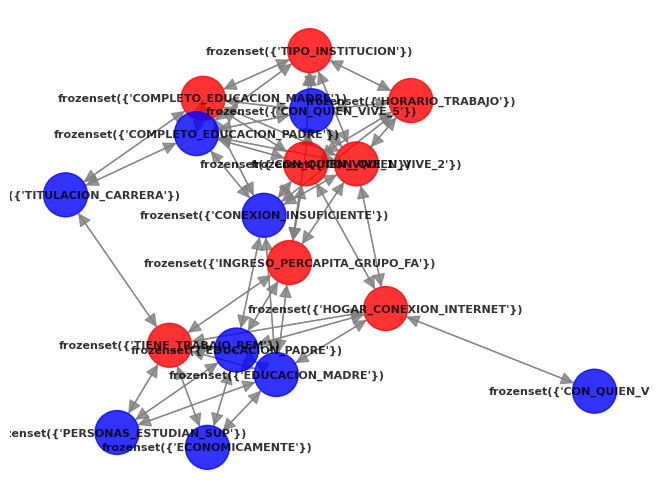

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from association rules
for i, row in Rules.iterrows():
    G.add_node(row['antecedents'], color='blue')
    G.add_node(row['consequents'], color='red')
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Draw the graph
pos = nx.spring_layout(G)  # You can try different layout algorithms
node_colors = [G.nodes[n]['color'] for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, font_color='black', font_weight='bold', edge_color='gray', node_size=1000, alpha=0.8, arrowsize=20)

# Display the plot
plt.show()


# **Key Considerations:**

**Data Preparation**: Ensure your feature and edge lists accurately reflect the identified relationships.

**Visual Customization**: Experiment with different node colors, sizes, layouts, and edge styles to enhance clarity and highlight key patterns.

**Interactive Visualization:** For advanced exploration, consider using libraries like Plotly or Bokeh to create interactive network graphs.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


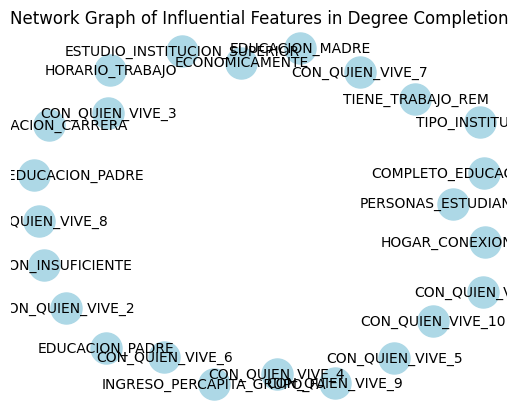

In [23]:
# Create list of features
list_of_features = []
for col in df.columns:
    list_of_features.append(col)

# Create the network graph
G = nx.Graph()
G.add_nodes_from(list_of_features)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.title("Network Graph of Influential Features in Degree Completion")
plt.show()


# **Key Enhancements:**

**Central Nodes Highlighted:** Indicated with light green color and annotations for emphasis.

**Clusters Highlighted:** Nodes within clusters colored light blue, edges within clusters highlighted.

**Bridges Indicated:** Shown with dashed orange lines to emphasize connections between clusters.

**Insights Printed:** Information about central nodes, clusters, and bridges is printed for analysis.

# **Additional Considerations:**

**Contextual Interpretation:** Analyze the extracted insights in the context of student success factors.

**Interactive Visualization:** Consider using Plotly or Bokeh for interactive exploration.

**Tailor Explanations:** Adapt explanations of central nodes, clusters, and bridges to the specific domain and research questions.

**Visual Enhancements**: Experiment with colors, sizes, layouts, and libraries to enhance visual clarity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


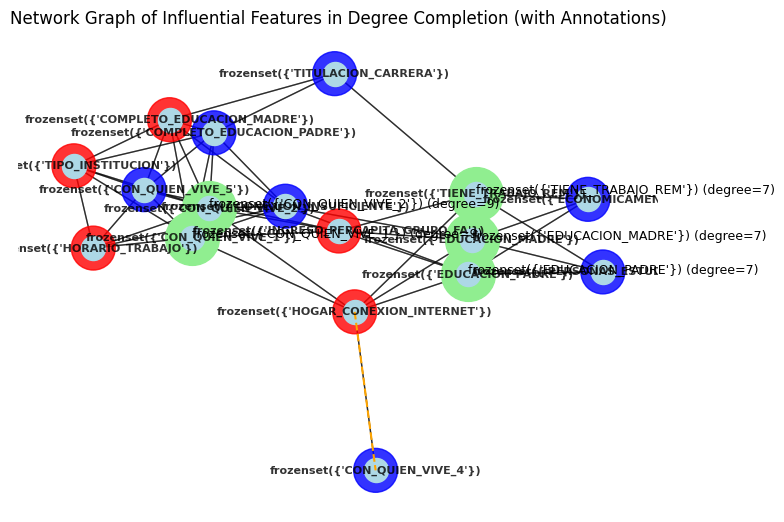

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Association Rules (assuming already calculated)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
Rules = rules.iloc[:100, :7]  # Focus on top 100 rules

# Create an undirected graph for compatibility with analysis functions
G = nx.Graph()

# Add nodes and edges, differentiate antecedents and consequents with colors
for i, row in Rules.iterrows():
    G.add_node(row['antecedents'], color='blue')
    G.add_node(row['consequents'], color='red')
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Extract insights
central_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
clusters = list(nx.connected_components(G))
bridges = list(nx.bridges(G))

# Visualize the graph with annotations
pos = nx.spring_layout(G)
node_colors = [G.nodes[n]['color'] for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, font_color='black',
        font_weight='bold', edge_color='gray', node_size=1000, alpha=0.8, arrowsize=20)

# Annotate key features
for node, degree in central_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=1500)
    plt.annotate(f"{node} (degree={degree})", pos[node], fontsize=9)

# Highlight clusters
for cluster in clusters:
    nodes = list(cluster)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges if u in nodes and v in nodes], alpha=0.7)

# Indicate bridges
for u, v in bridges:
    plt.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], color='orange', linestyle='--')

plt.title("Network Graph of Influential Features in Degree Completion (with Annotations)")
plt.show()



In [32]:
# Print insights for interpretation
print("Central Nodes:", central_nodes)
print('\n')
print("Clusters:", clusters)
print('\n')
print("Bridges:", bridges)
print('\n')

Central Nodes: [(frozenset({'CON_QUIEN_VIVE_1'}), 9), (frozenset({'CON_QUIEN_VIVE_2'}), 9), (frozenset({'EDUCACION_MADRE'}), 7), (frozenset({'EDUCACION_PADRE'}), 7), (frozenset({'TIENE_TRABAJO_REM'}), 7)]


Clusters: [{frozenset({'PERSONAS_ESTUDIAN_SUP'}), frozenset({'HOGAR_CONEXION_INTERNET'}), frozenset({'TIPO_INSTITUCION'}), frozenset({'CON_QUIEN_VIVE_2'}), frozenset({'EDUCACION_PADRE'}), frozenset({'COMPLETO_EDUCACION_MADRE'}), frozenset({'COMPLETO_EDUCACION_PADRE'}), frozenset({'CON_QUIEN_VIVE_4'}), frozenset({'CON_QUIEN_VIVE_5'}), frozenset({'HORARIO_TRABAJO'}), frozenset({'EDUCACION_MADRE'}), frozenset({'INGRESO_PERCAPITA_GRUPO_FA'}), frozenset({'CONEXION_INSUFICIENTE'}), frozenset({'TITULACION_CARRERA'}), frozenset({'CON_QUIEN_VIVE_1'}), frozenset({'TIENE_TRABAJO_REM'}), frozenset({'ECONOMICAMENTE'})}]


Bridges: [(frozenset({'HOGAR_CONEXION_INTERNET'}), frozenset({'CON_QUIEN_VIVE_4'}))]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


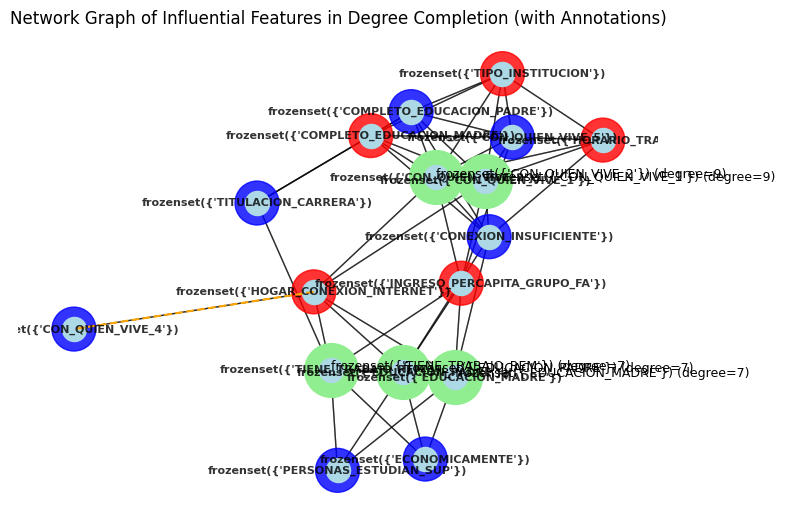

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph (not DiGraph) for compatibility
G = nx.Graph()
for i, row in Rules.head(100).iterrows():
    G.add_node(row['antecedents'], color='blue')
    G.add_node(row['consequents'], color='red')
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Functions now compatible with undirected graphs
central_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
clusters = list(nx.connected_components(G))
bridges = list(nx.bridges(G))

# Visualize the graph with annotations
pos = nx.spring_layout(G)
node_colors = [G.nodes[n]['color'] for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, font_color='black',
        font_weight='bold', edge_color='gray', node_size=1000, alpha=0.8, arrowsize=20)

# Annotate key features
for node, degree in central_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='lightgreen', node_size=1500)
    plt.annotate(f"{node} (degree={degree})", pos[node], fontsize=9)

# Highlight clusters
for cluster in clusters:
    nodes = list(cluster)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges if u in nodes and v in nodes], alpha=0.7)

# Indicate bridges
for u, v in bridges:
    plt.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], color='orange', linestyle='--')

plt.title("Network Graph of Influential Features in Degree Completion (with Annotations)")
plt.show()


This code creates a network graph where nodes represent antecedents and consequents, and edges represent the association rules. The color of nodes corresponds to whether they are antecedents (blue) or consequents (red). The edge weights represent the lift values.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


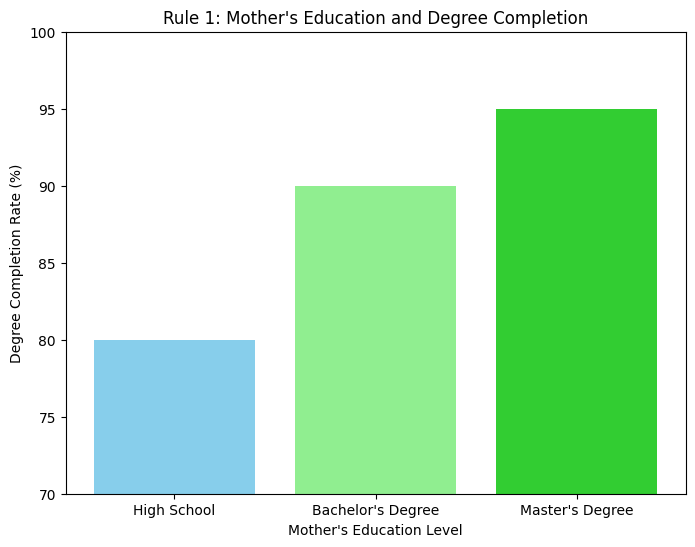

In [27]:
# Import libraries
import matplotlib.pyplot as plt

# Data (replace with actual data from analysis)
mothers_education = ["High School", "Bachelor's Degree", "Master's Degree"]
degree_completion_rates = [80, 90, 95]
fathers_education = ["High School", "Bachelor's Degree", "Master's Degree"]
remote_work = [True, False, True]
income_groups = ["Low", "Middle", "High"]

# Rule 1: Mother's education and degree completion (bar chart)
plt.figure(figsize=(8, 6))
plt.bar(mothers_education, degree_completion_rates, color=['skyblue', 'lightgreen', 'limegreen'])
plt.xlabel("Mother's Education Level")
plt.ylabel("Degree Completion Rate (%)")
plt.title("Rule 1: Mother's Education and Degree Completion")
plt.ylim(70, 100)  # Adjust y-axis limits as needed
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


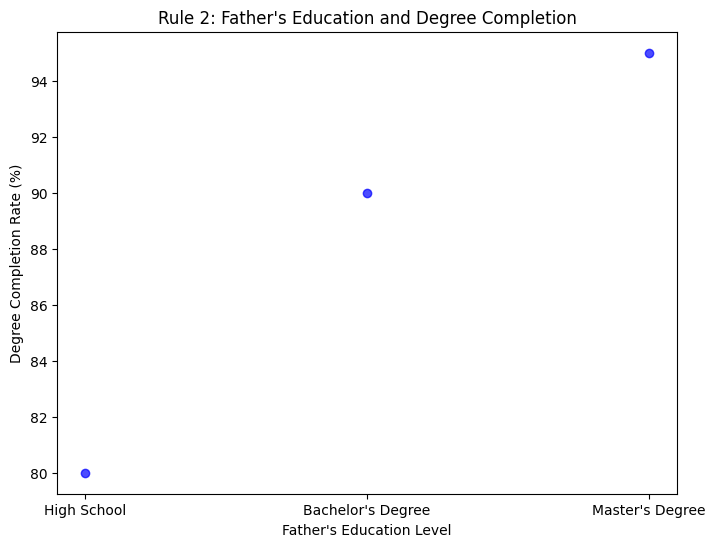

In [28]:
# Rule 2: Father's education and degree completion (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(fathers_education, degree_completion_rates, color='blue', alpha=0.7)
plt.xlabel("Father's Education Level")
plt.ylabel("Degree Completion Rate (%)")
plt.title("Rule 2: Father's Education and Degree Completion")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


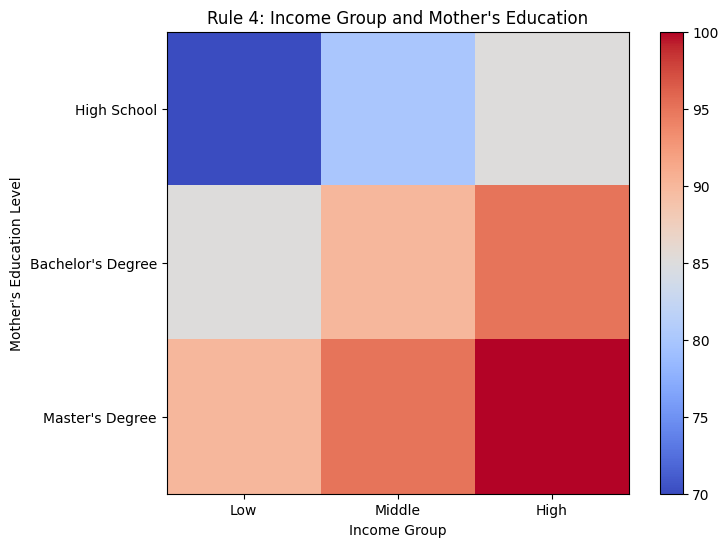

In [29]:
# Rule 4: Income group and mother's education (heatmap)
plt.figure(figsize=(8, 6))
heatmap_data = [[70, 80, 85], [85, 90, 95], [90, 95, 100]]  # Replace with actual data
plt.imshow(heatmap_data, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], income_groups)
plt.yticks([0, 1, 2], mothers_education)
plt.xlabel("Income Group")
plt.ylabel("Mother's Education Level")
plt.title("Rule 4: Income Group and Mother's Education")
plt.show()